In this workbook I will split my data into testing and trianing sets and evaluate several different models: 
    1. Shuffle the data
    2. Split the data into y, and X
    3. Split the data into train and test
    4. Models:
        i) Logistic Regression
        ii) KNearestNeighbors
        iii) Decision Tree
        iv) Linear kernel SVC 
        v) SVC 
        vi) Neural Netwrok
        vii) Random Forest
        viii) Gradient Boosting

https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1


In [21]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

In [8]:
#Import data
data = pd.read_csv('C:\\Users\\ziggy\\Springboard\\Python_Projects\\Spotify Hit Prediction\\2_Exploratory Data Analysis\\Cleaned_FullDataset', index_col=0)


In [9]:
data.head()

,Title,Artist,URI,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Target
0,hanging by a moment,lifehouse,0wqOReZDnrefefEsrIGeR4,0.541,0.864,1.0,-4.915,1.0,0.0357,0.00118,0.00000,0.0896,0.435,124.557,216067.0,4.0,1
1,fallin’,alicia keys,0KQx6HOpJueiSkztcS0r7D,0.652,0.609,11.0,-7.519,0.0,0.0370,0.26300,0.00101,0.2330,0.482,95.986,210200.0,3.0,1
2,all for you,janet jackson,5X8kkUaUlAyAUr9TYqDFTH,0.753,0.934,2.0,-3.011,1.0,0.0736,0.01740,0.06500,0.1280,0.730,113.525,329933.0,3.0,1
3,drops of jupiter (tell me),train,2hKdd3qO7cWr2Jo0Bcs0MA,0.481,0.638,0.0,-5.862,1.0,0.0276,0.15300,0.00000,0.1540,0.497,79.064,259933.0,4.0,1
4,i’m real,jennifer lopez feat. ja rule,6MLsahMK3VvH9NUwXOktdS,0.708,0.587,11.0,-7.930,0.0,0.1510,0.27300,0.00000,0.0718,0.554,83.460,262133.0,4.0,1


In [10]:
#Shuffle dataset

data = data.sample(frac=1, random_state=25).reset_index(drop=True)

In [11]:
data.head()

,Title,Artist,URI,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Target
0,needle and thread,ages and ages,2aq5ASfM6GbR5Rw3bhl6Nu,0.621,0.555,5.0,-8.120,1.0,0.0305,0.367000,0.000008,0.188,0.660,81.464,182705.0,4.0,0
1,young americans (feat. charles kelley & josh k...,colt ford,0ygs3Zbf3myQraevLS9jNk,0.603,0.814,4.0,-5.308,1.0,0.0297,0.013800,0.000000,0.746,0.846,90.037,170322.0,4.0,0
2,six pairs of feet and one pair of legs,julie christmas,3h01CU2OCeQBz6NY4PKzZc,0.233,0.629,7.0,-5.974,0.0,0.0391,0.000709,0.891000,0.113,0.134,117.639,262616.0,4.0,0
3,cater 2 u,destiny’s child,6uYAPqxP69zfpCbsTHXgiz,0.605,0.584,11.0,-7.043,0.0,0.1970,0.286000,0.000000,0.235,0.464,125.802,245400.0,4.0,1
4,cutthroat committee,young dolph,78myyEywJ4rMl8XCCu0Dr6,0.861,0.727,7.0,-5.622,1.0,0.2060,0.005570,0.000000,0.107,0.443,151.076,178107.0,4.0,0


In [12]:
#preprocessing & split data into y, X and then into train and test.
def preprocess_inputs(dataframe):
    #Drop categorical variables
    dataframe = dataframe.drop(['Title','Artist', 'URI'], axis=1)
    #Split y, X
    y= dataframe['Target']
    X=dataframe.drop('Target', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=True, random_state=25)
    #Scale 
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)


In [14]:
y_train.value_counts()

0    10812
1     1267
Name: Target, dtype: int64

In [15]:
print('The number of hit  songs represents',round(1277/10802*100, 2),'% of the y_train datset.')

The number of hit songs represents 11.82 % of the y_train datset.


In [16]:
y_test.value_counts()

0    4647
1     530
Name: Target, dtype: int64

In [17]:
print('The number of hit songs represents',round(520/4657*100, 2),'% of the y_test datset.')

The number of hit songs represents 11.17 % of the y_test datset.


In [18]:
X_train.var()

danceability        1.000083
energy              1.000083
key                 1.000083
loudness            1.000083
mode                1.000083
speechiness         1.000083
acousticness        1.000083
instrumentalness    1.000083
liveness            1.000083
valence             1.000083
tempo               1.000083
duration_ms         1.000083
time_signature      1.000083
dtype: float64

Training:

Models:
    Logistic Regression : LogisticRegression()
    K-Nearest Neighbors : KNeighborsClassifier()
    Decision Tree : DecisionTreeClassifier()
    Support Vector Machine (Linear Kernel) : LinearSVC()
    Support Vector Machine (RBF Kernel) : SVC()
    Neural Network : MLPClassifier()
    Random Forest : RandomForestClassifier()
    Gradient Boosting : GradientBoostingClassifier()


In [19]:
#Logistic Regression 

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.decision_function(X_test)
    
print("Logistic Regression:" + " {:.2f}%".format(logistic_model.score(X_test, y_test)*100))

1,2,4,6,7,8,13
#multiply coeficients by std 

#dummy classifier from sklearn

Logistic Regression: 89.65%


(1, 2, 4, 6, 7, 8, 13)

In [33]:
print("Coefficients: \n", logistic_model.coef_)

Coefficients: 
 [[ 0.46635083 -0.90537029  0.04984175  2.53725904 -0.03553295 -0.33220638
  -0.77338189 -1.89522311 -0.23505458  0.0111005  -0.00270143  0.05564394
   0.33746755]]


In [35]:
math.exp(2.53725904)

12.644964086709212

In [20]:
logistic_model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
#K-Nearest Neighbors
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

y_pred_KNN = KNN_model.predict_proba(X_test)
    
print("K-Nearest Neighbors:" + " {:.2f}%".format(KNN_model.score(X_test, y_test)*100))


K-Nearest Neighbors: 87.81%


In [22]:
#Decision tree
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)

y_pred_tree = Tree_model.predict(X_test)
    
print("Decision Tree:" + " {:.2f}%".format(Tree_model.score(X_test, y_test)*100))

Decision Tree: 85.30%


In [23]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[4264  383]
 [ 378  152]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4647
           1       0.28      0.29      0.29       530

    accuracy                           0.85      5177
   macro avg       0.60      0.60      0.60      5177
weighted avg       0.85      0.85      0.85      5177



In [24]:
#SVM (Linear Kernel)

SVM_model = LinearSVC()
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.decision_function(X_test)
    
print("Support Vector Machine (Linear Kernel):" + " {:.2f}%".format(SVM_model.score(X_test, y_test)*100))

#coeficient method. 

Support Vector Machine (Linear Kernel): 89.80%


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
#SVM (RBF Kernel)

SVC_model = SVC()
SVC_model.fit(X_train, y_train)

y_pred_SVC = SVC_model.decision_function(X_test)
    
print("Support Vector Machine (RBF Kernel):" + " {:.2f}%".format(SVC_model.score(X_test, y_test)*100))

Support Vector Machine (RBF Kernel): 89.76%


In [26]:
#Neural Network

Neural_model = MLPClassifier()
Neural_model.fit(X_train, y_train)


  
print("Neural Network:" + " {:.2f}%".format(Neural_model.score(X_test, y_test)*100))

Neural Network: 89.63%


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
#Radom Forest

Forest_model = RandomForestClassifier()
Forest_model.fit(X_train, y_train)

y_pred_forest = Forest_model.predict(X_test)
    
print("Random Forest:" + " {:.2f}%".format(Forest_model.score(X_test, y_test)*100))

Random Forest: 89.97%


In [28]:
#Gradient Boosting

Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

#y_pred_Neural = Neural_model.decision_function(X_test)
    
print("Gradient Boosting:" + " {:.2f}%".format(Gradient_model.score(X_test, y_test)*100))

Gradient Boosting: 89.76%


All models score between 85-90 % accuracy. This might seem quite high but in actuality, the hit songs represent about 10% of the training and testing data. I will now compute the ROC curve to get a beter idea of how good the models are.

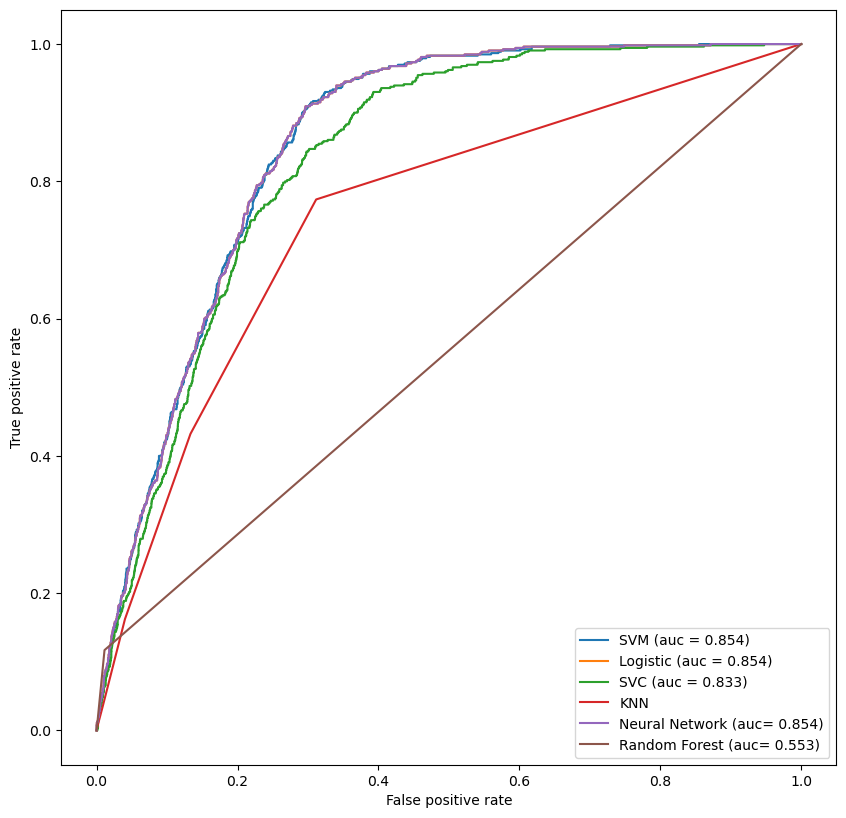

In [59]:
#ROC curve for Logistic, KNN, SVMs

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_KNN[:,1])

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_SVC)
auc_svc = auc(svc_fpr, svc_tpr)

nn_fpr, nn_tpr, threshold = roc_curve(y_test, y_pred)
auc_nn = auc(nn_fpr, nn_tpr)

forest_fpr, forest_tpr, threshold = roc_curve(y_test, y_pred_forest)
auc_forest = auc(forest_fpr, forest_tpr)

plt.figure(figsize=(10,10), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label="SVM (auc = %0.3f)" % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label="Logistic (auc = %0.3f)" % auc_logistic)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label="SVC (auc = %0.3f)" % auc_svc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label="KNN")
plt.plot(nn_fpr, nn_tpr,linestyle='-', label="Neural Network (auc= %0.3f)" % auc_nn)
plt.plot(forest_fpr, forest_tpr,linestyle='-', label="Random Forest (auc= %0.3f)" % auc_forest)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
